**Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

**Reading the DataSet**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data_Set_Code/employee_promotion.csv")

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [6]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


**Data Analysis and Preprocessing**

In [7]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [8]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [9]:
df.drop(columns=['employee_id'], inplace=True)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


**Deviding features**

In [10]:
num_features = [i for i in df.columns if df.dtypes[i]!='object']
num_features

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [11]:
cat_features = [i for i in df.columns if df.dtypes[i]=='object']
df[cat_features].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

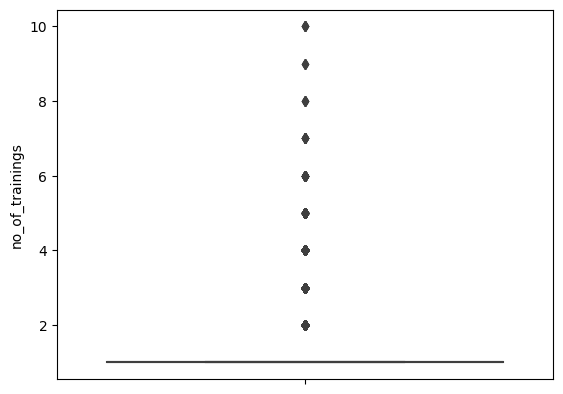

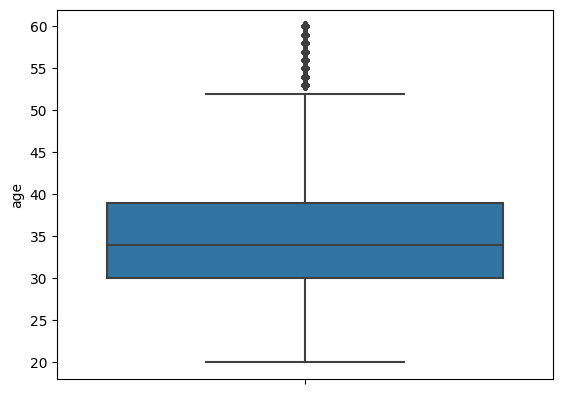

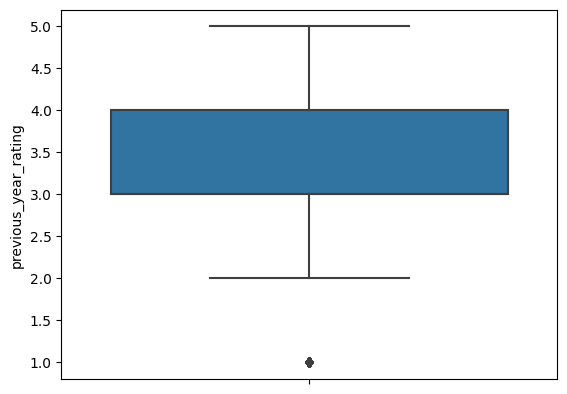

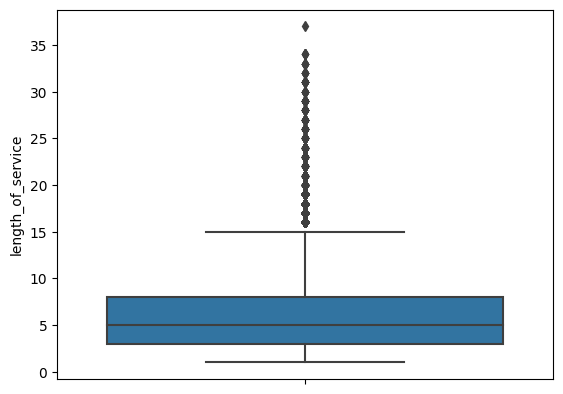

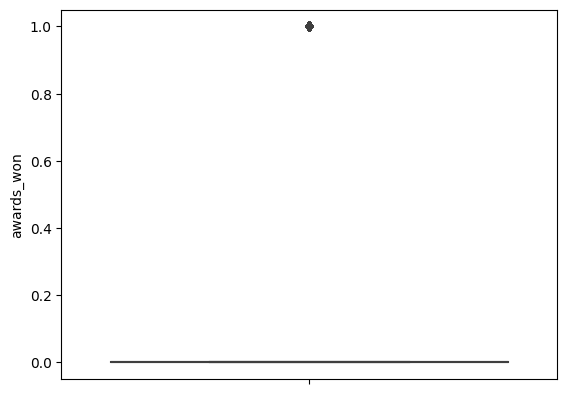

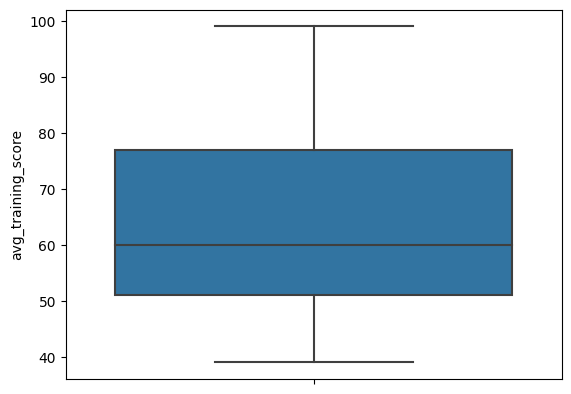

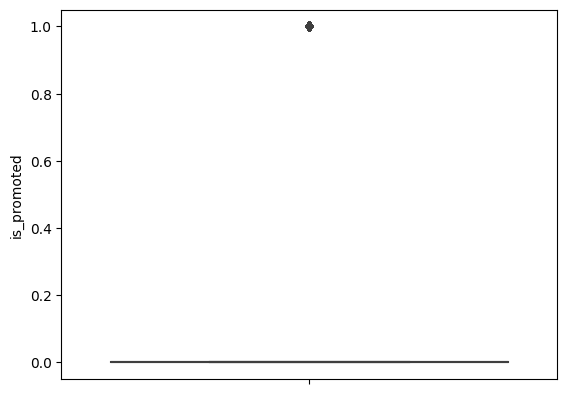

In [12]:
for i in num_features:
  plt.figsize=(10,5)
  sns.boxplot(y=df[i])
  plt.show()

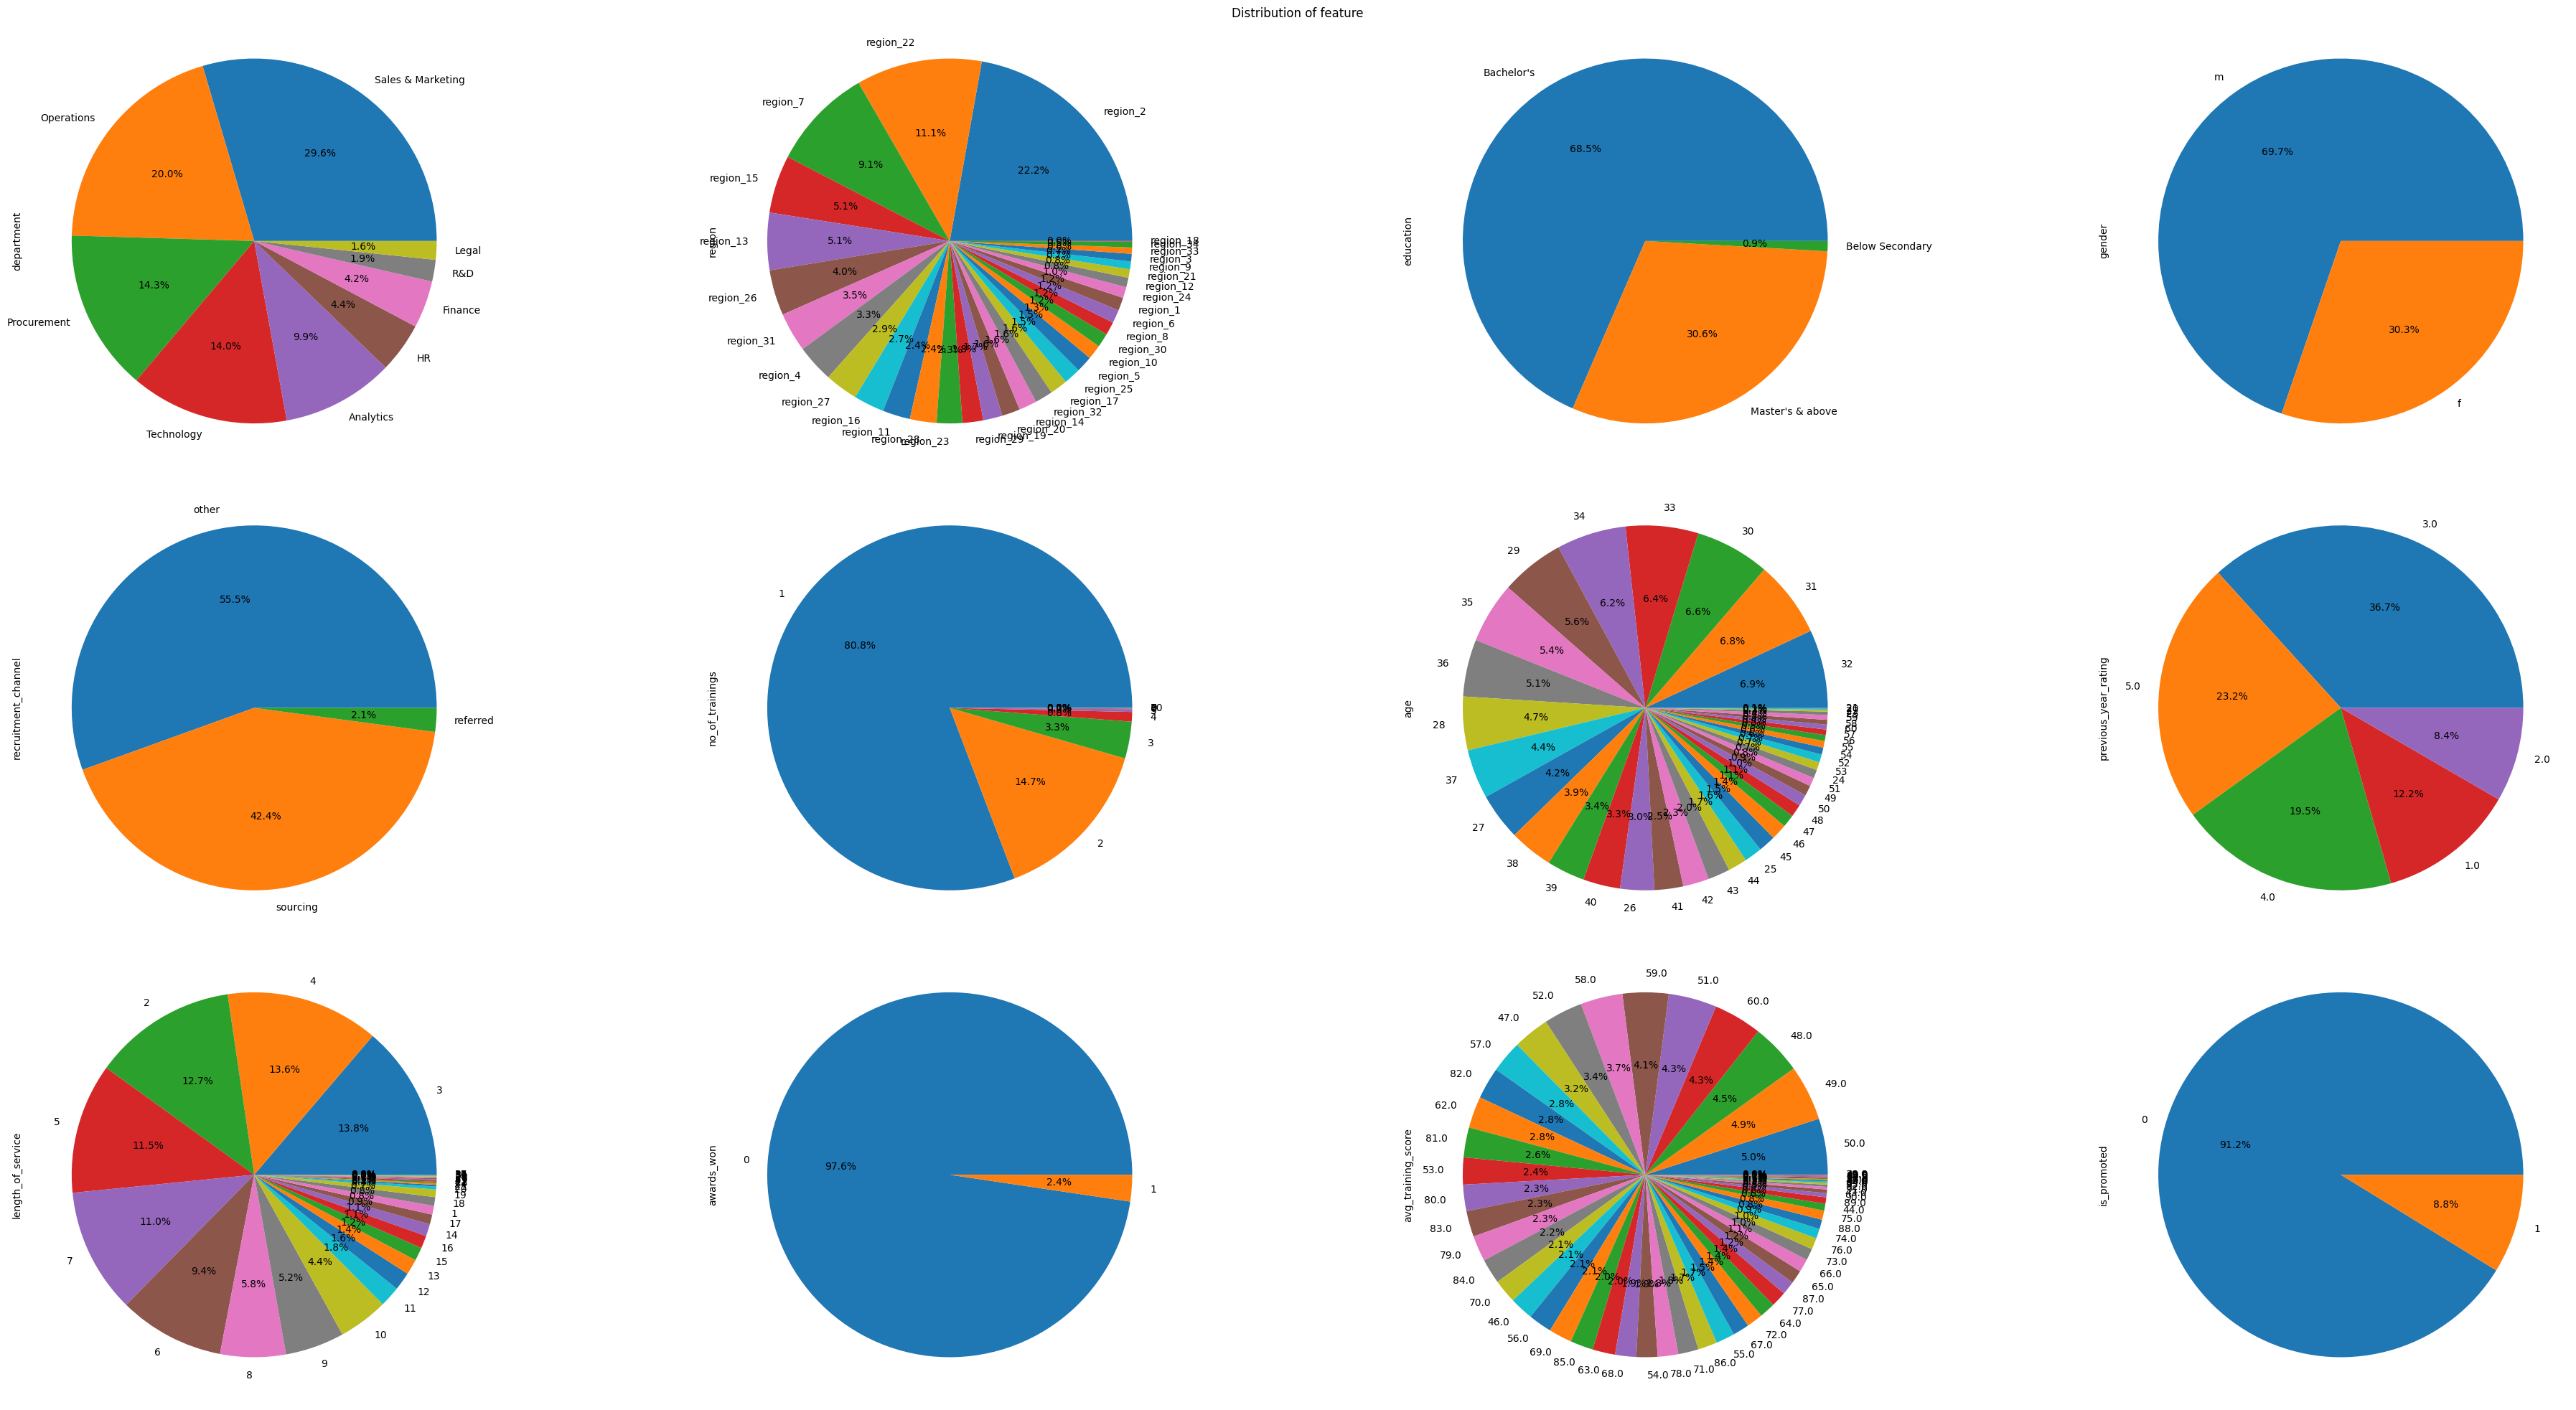

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))

for i, feature in enumerate(df.columns):
  row = int(i/4)
  col = i%4
  pd.value_counts(df.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of feature')
plt.tight_layout()

<ipython-input-14-238461d45211>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])
<ipython-input-14-238461d45211>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])
<ipython-input-14-238461d45211>:7: UserWarning: 



<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

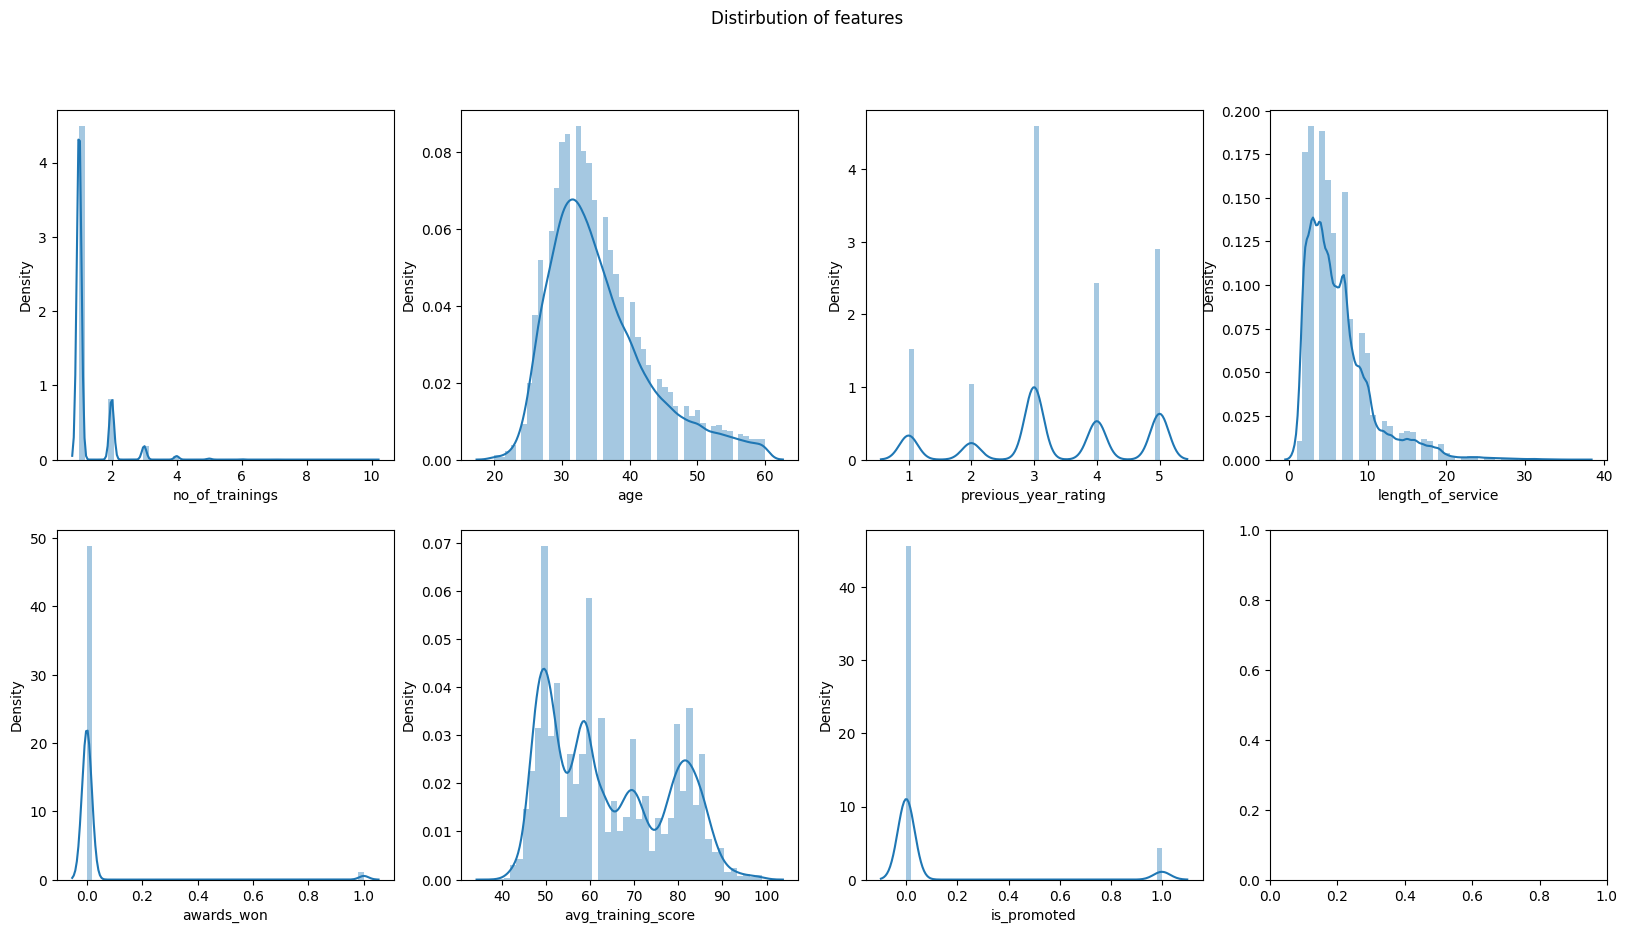

In [14]:
columns = [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

**Plotting Q-Q Plot**

In [15]:
import scipy.stats as stat
import pylab

In [16]:
def plot_curve(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

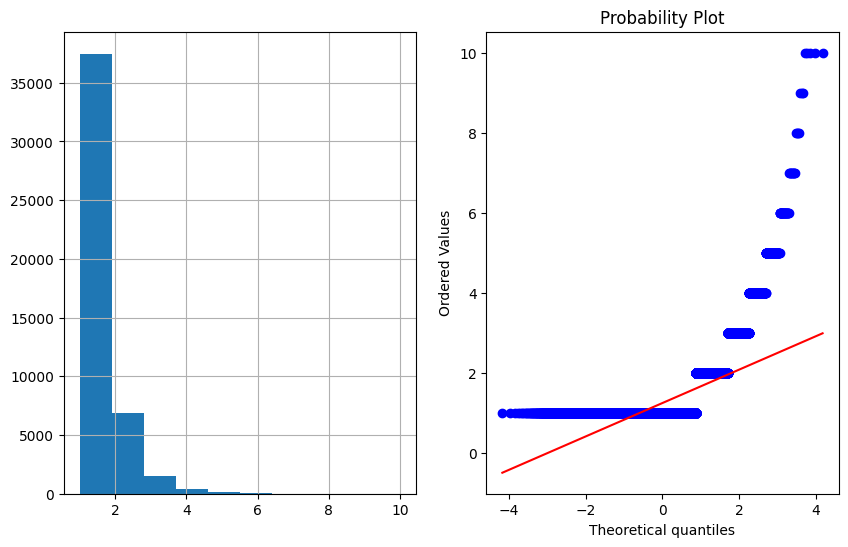

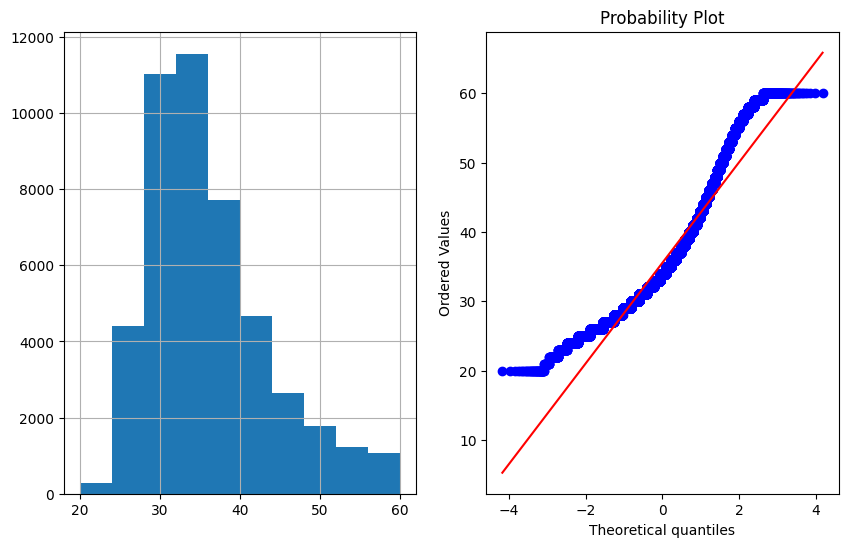

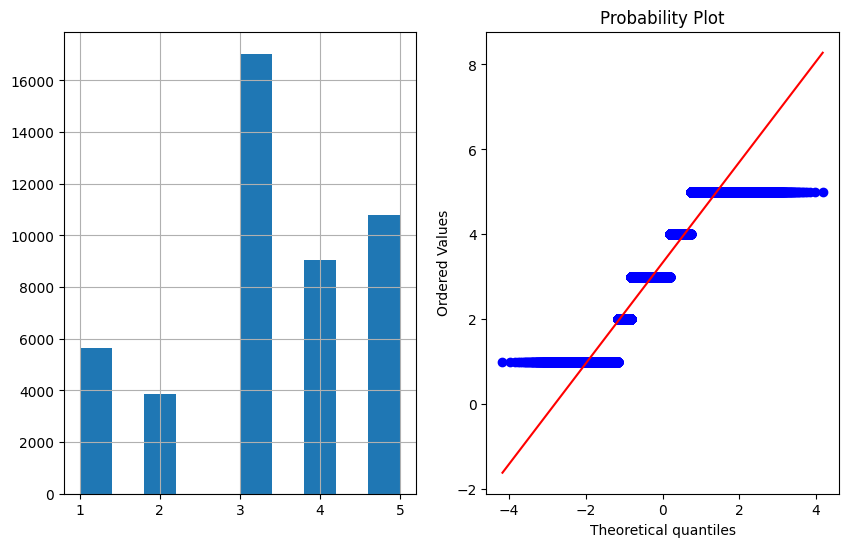

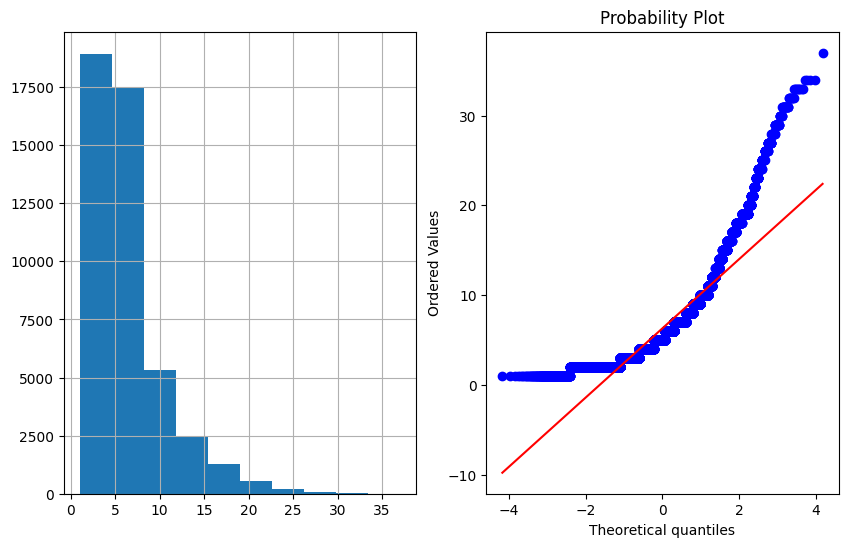

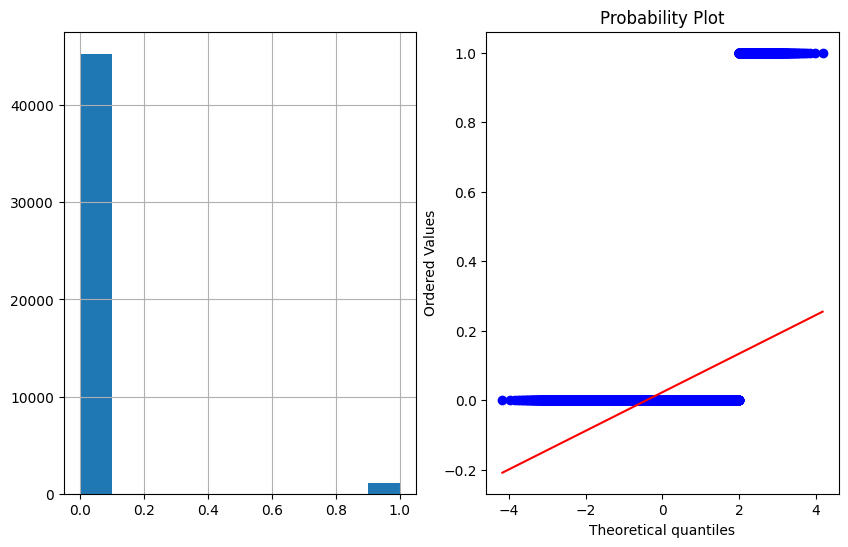

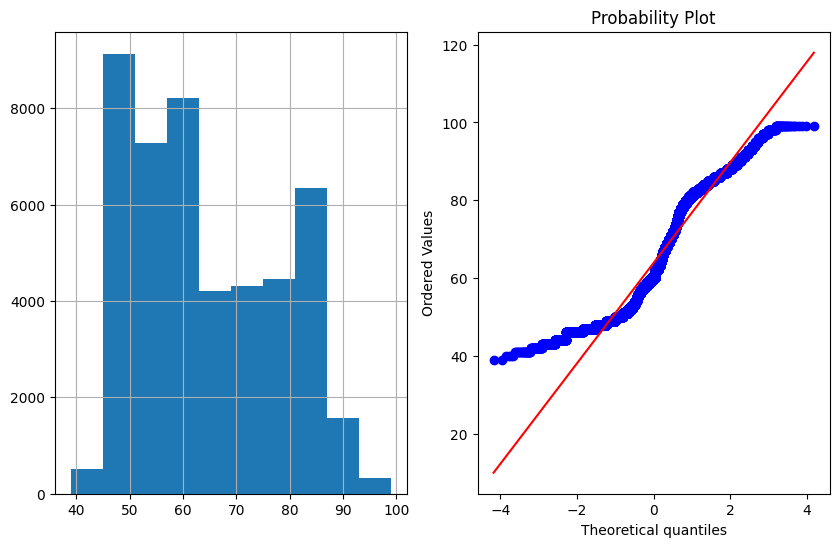

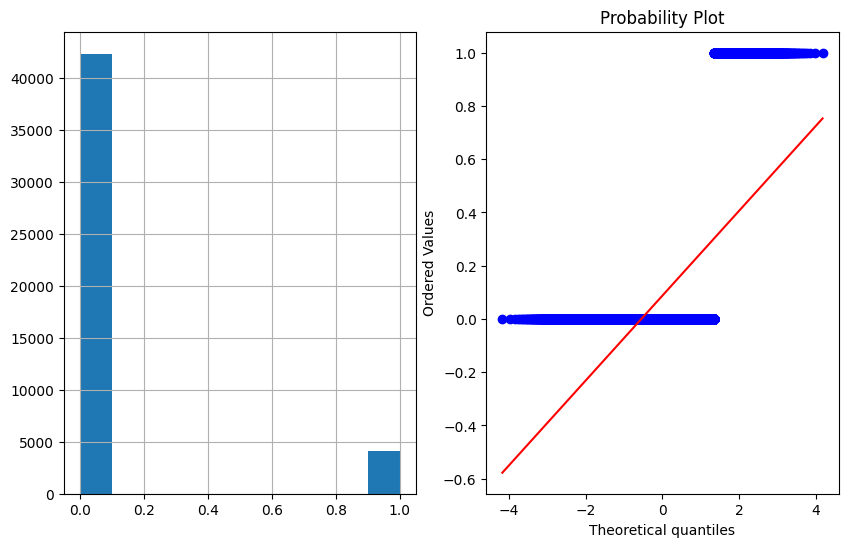

In [17]:
for feature in columns:
  plot_curve(df,feature)

**log transformation**

In [18]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log) #9 index position
df.insert(12, 'avg_training_score_log', score_log)

df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0


<ipython-input-19-6e3fef8a885e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age_log'], ax=ax1)
<ipython-input-19-6e3fef8a885e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length_of_service_log'], ax=ax2)
<ipython-input-19-6e3fef8a885e>:9: UserWarning: 

`distplot` is a deprecat

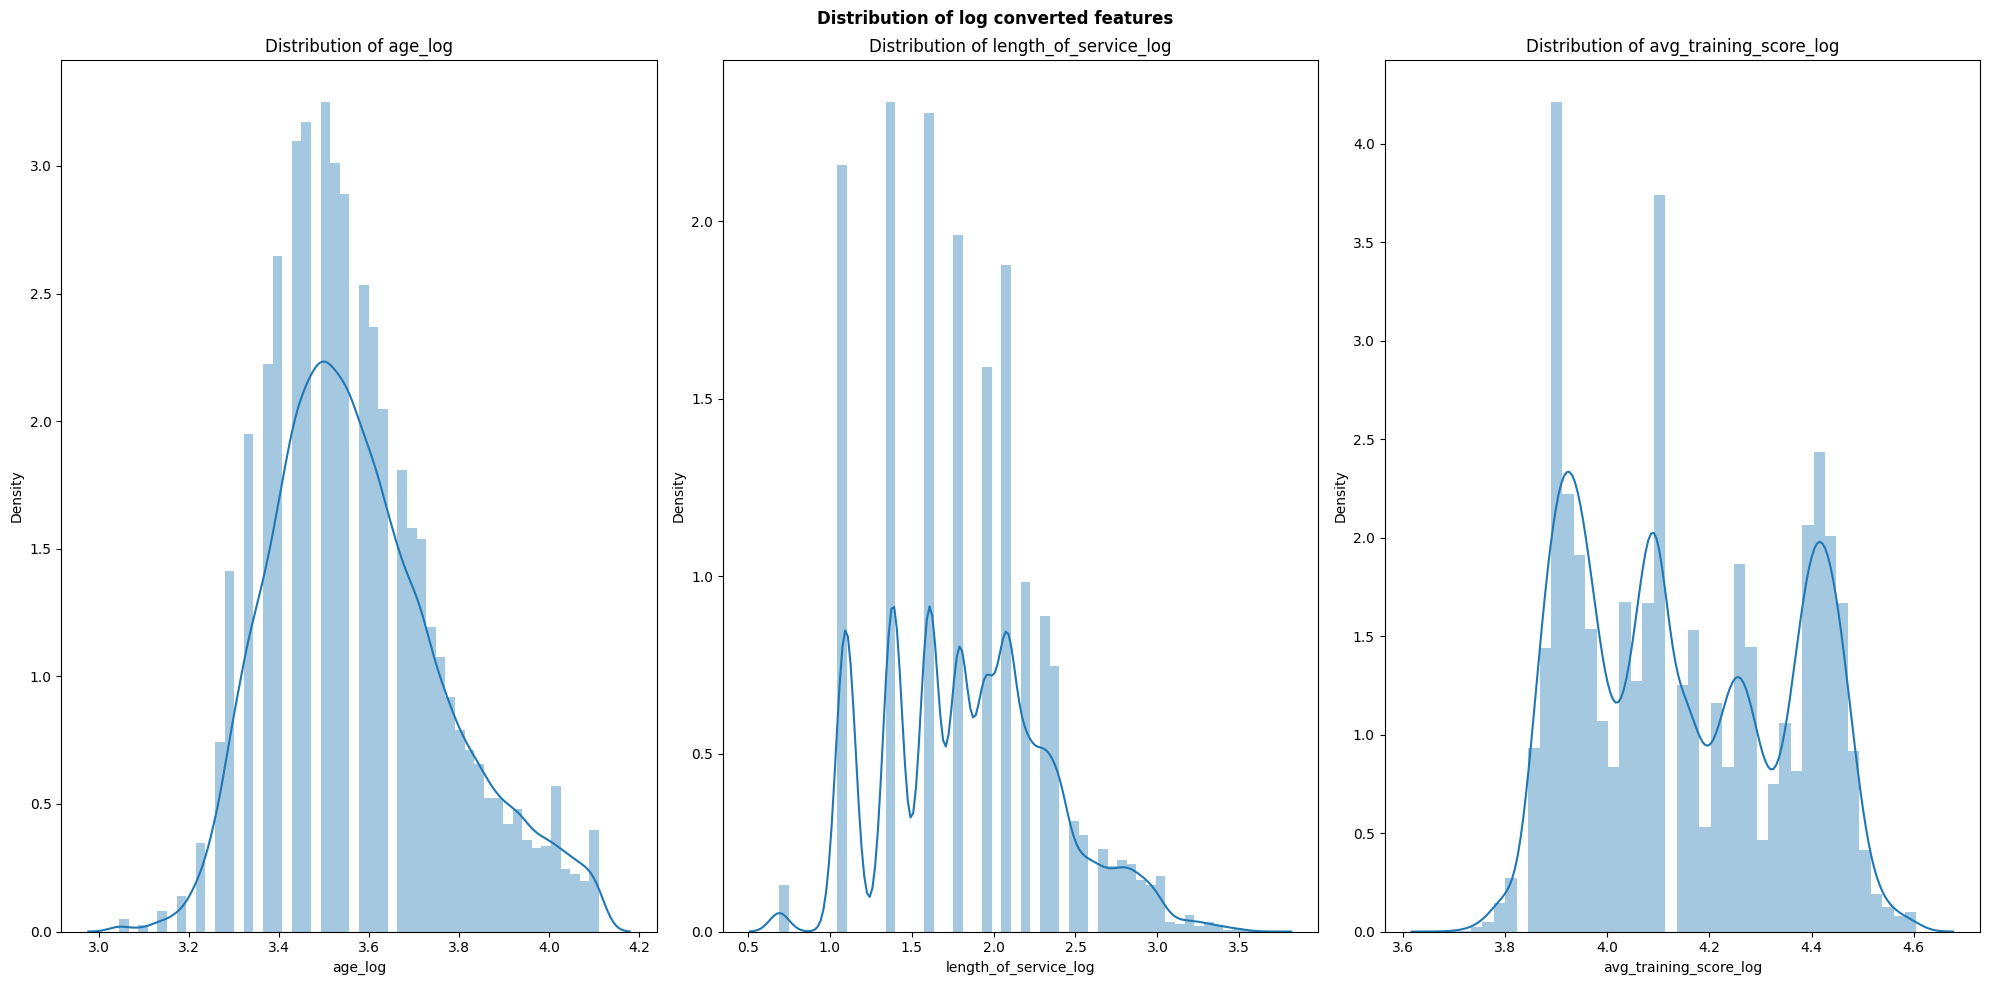

In [19]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

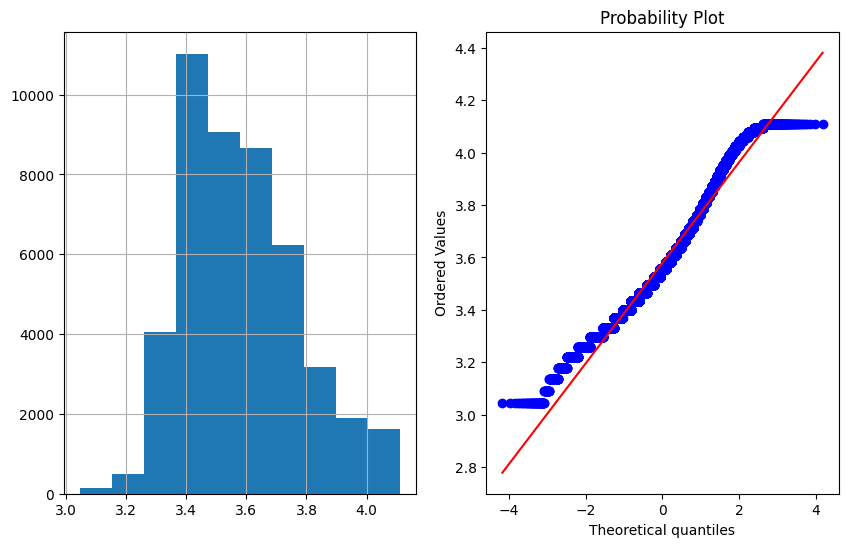

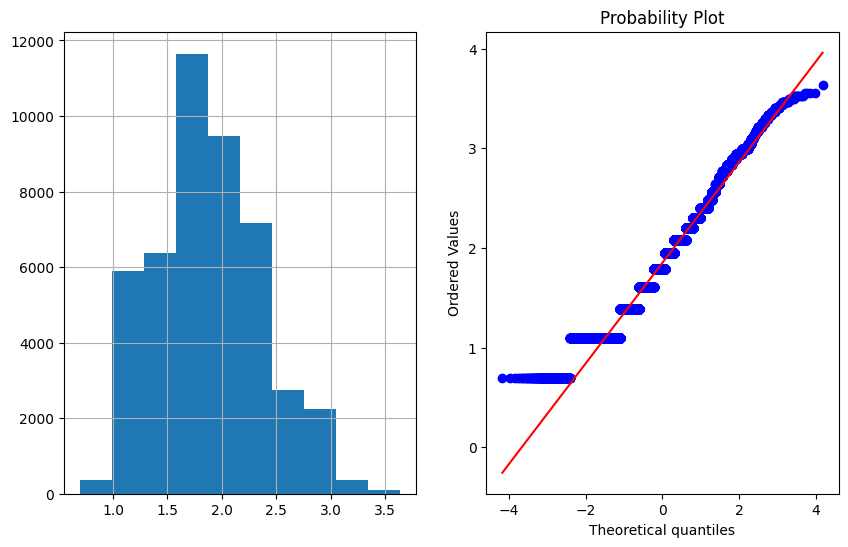

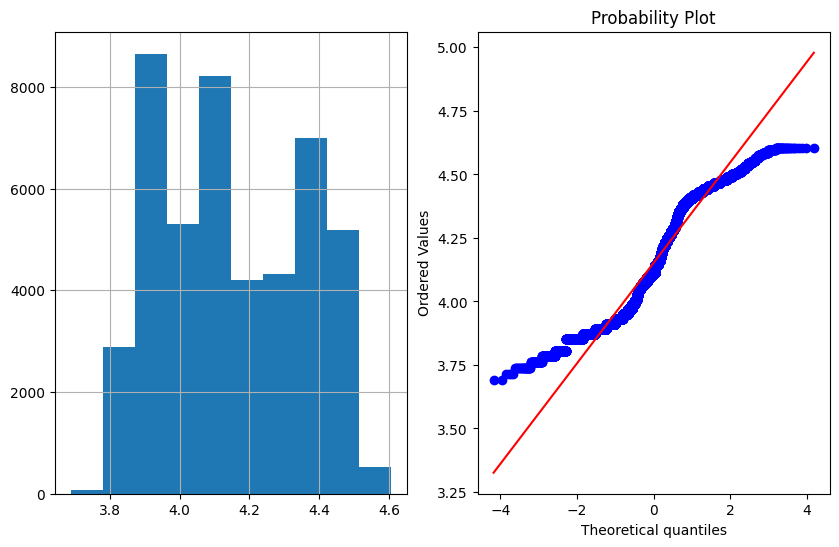

In [20]:
for feature in log_columns:
    plot_curve(df,feature)

**Heat Map**

<ipython-input-21-5352fbe9f9b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=5, cmap='YlGnBu')


<Axes: title={'center': 'Correlation of features'}>

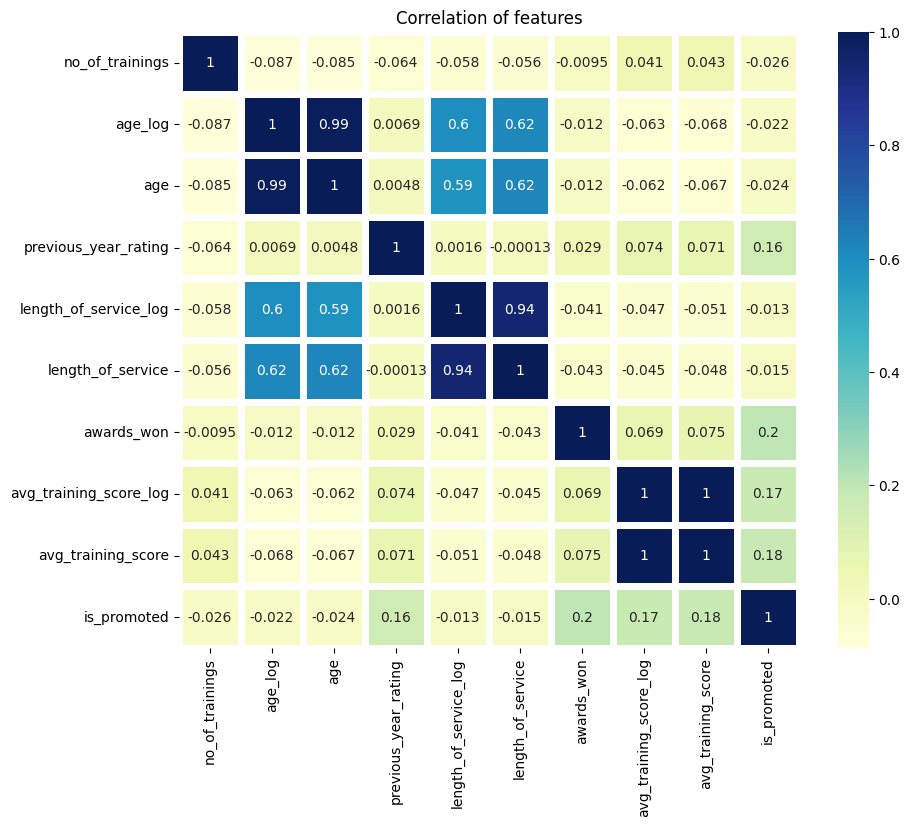

In [21]:
plt.figure(figsize=(10,8))
plt.title("Correlation of features")
sns.heatmap(df.corr(), annot=True, linewidths=5, cmap='YlGnBu')

In [22]:
df.drop(['age', 'length_of_service', 'avg_training_score'], axis =1 ,inplace=True)


**One Hot Encoding**

In [23]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,no_of_trainings,age_log,previous_year_rating,length_of_service_log,awards_won,avg_training_score_log,is_promoted,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,5.0,2.197225,0,3.912023,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,3.433987,5.0,1.609438,0,4.110874,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,3.555348,3.0,2.079442,0,3.931826,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,3.688879,1.0,2.397895,0,3.931826,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,3.828641,3.0,1.098612,0,4.304065,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


**Scaling our Data**

In [24]:
from sklearn.preprocessing import StandardScaler
features = np.array(df_encoded.columns).reshape(-1,1)

for feature in features:
  scaler = StandardScaler()
  scaler.fit(df_encoded[feature])
  df_encoded[feature] = scaler.transform(df_encoded[feature])
df_encoded.head()                                

,no_of_trainings,age_log,previous_year_rating,length_of_service_log,awards_won,avg_training_score_log,is_promoted,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,0.019377,1.324653,0.673784,-0.155136,-1.177045,-0.310195,-0.332214,-0.208992,-0.215593,...,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,1.518245,-1.518245,-1.117074,-0.146768,1.166064
1,-0.418611,-0.749600,1.324653,-0.474482,-0.155136,-0.202848,-0.310195,-0.332214,-0.208992,-0.215593,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
2,-0.418611,-0.125493,-0.263965,0.443690,-0.155136,-1.080029,-0.310195,-0.332214,-0.208992,-0.215593,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,-1.117074,-0.146768,1.166064
3,1.226184,0.561202,-1.852582,1.065803,-0.155136,-1.080029,-0.310195,-0.332214,-0.208992,-0.215593,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
4,-0.418611,1.279937,-0.263965,-1.472401,-0.155136,0.743621,-0.310195,-0.332214,-0.208992,-0.215593,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586


**Spllitting the data**

In [25]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y =df_encoded['is_promoted'].astype(int)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

**Model Development**


1.   Decision Tree Classifier
2.   Random Forest Classifier
3.   Logistic regression








In [27]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score,
    confusion_matrix, f1_score, precision_recall_curve, roc_curve
)

In [28]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

**Decision Tree**

In [30]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:,1] #calculates the predicted probabilities of the positive class (class 1) for each sample in the test dataset X_test using the trained decision tree classifier dt_clf.
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[7854  619]
 [ 438  365]]
Accuracy: 0.8861, Precision: 0.6591, Recall 0.6907, F1: 0.6727, AUC: 0.6906


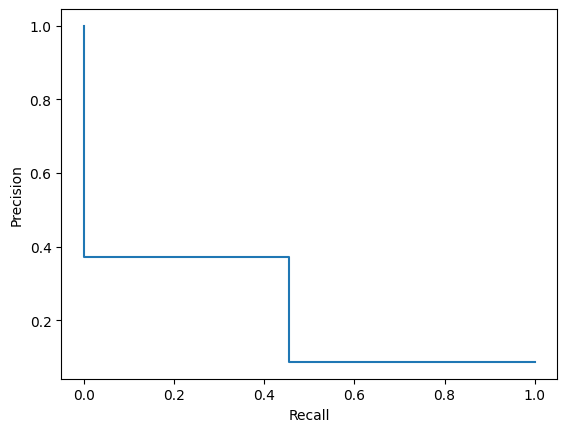

In [31]:
precision, recall, _ = precision_recall_curve(y_test, dt_pred_proba, pos_label=3)
precision_recall_display = PrecisionRecallDisplay(precision=precision, recall=recall)
precision_recall_display.plot()

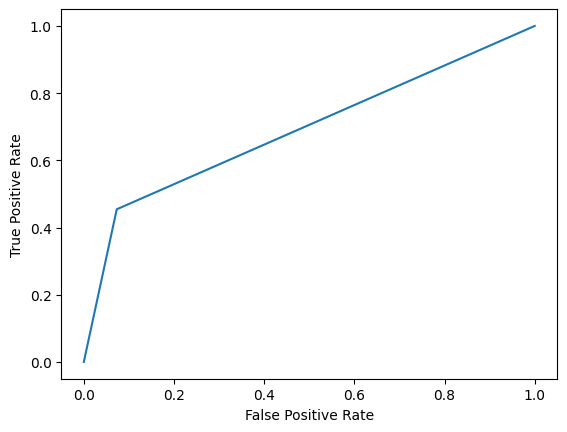

In [32]:
fpr, tpr, _ = roc_curve(y_test, dt_pred_proba, pos_label=3)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

**Logistic Regression**

In [33]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[7854  619]
 [ 438  365]]
Accuracy: 0.8861, Precision: 0.6591, Recall 0.6907, F1: 0.6727, AUC: 0.6906


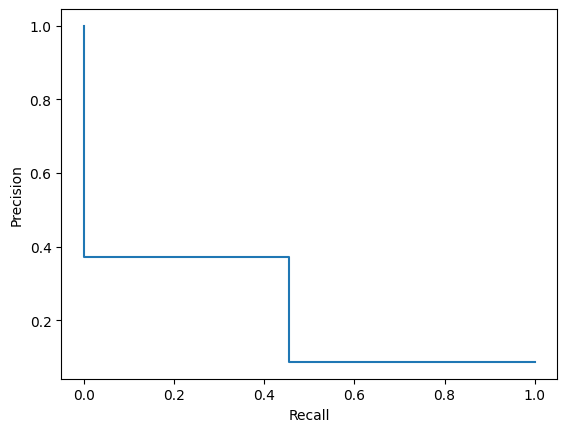

In [34]:
precision, recall, _ = precision_recall_curve(y_test, dt_pred_proba, pos_label=3)
precision_recall_display = PrecisionRecallDisplay(precision=precision, recall=recall)
precision_recall_display.plot()

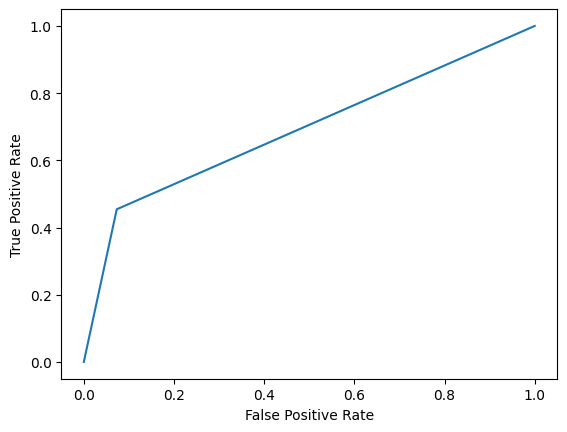

In [35]:
fpr, tpr, _ = roc_curve(y_test, dt_pred_proba, pos_label=3)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

**Random Forest**

In [36]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[8430   43]
 [ 530  273]]
Accuracy: 0.9382, Precision: 0.9024, Recall 0.6675, F1: 0.7275, AUC: 0.7960


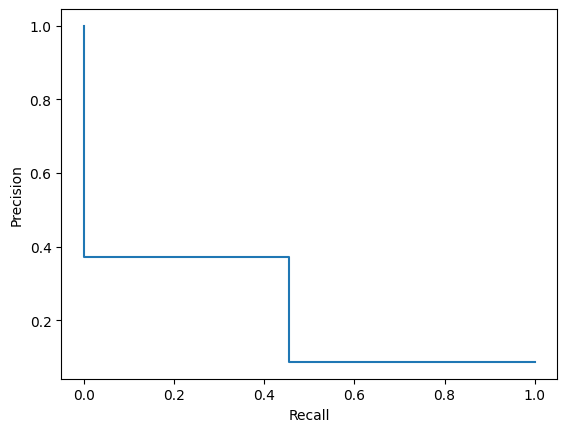

In [37]:
precision, recall, _ = precision_recall_curve(y_test, dt_pred_proba, pos_label=3)
precision_recall_display = PrecisionRecallDisplay(precision=precision, recall=recall)
precision_recall_display.plot()

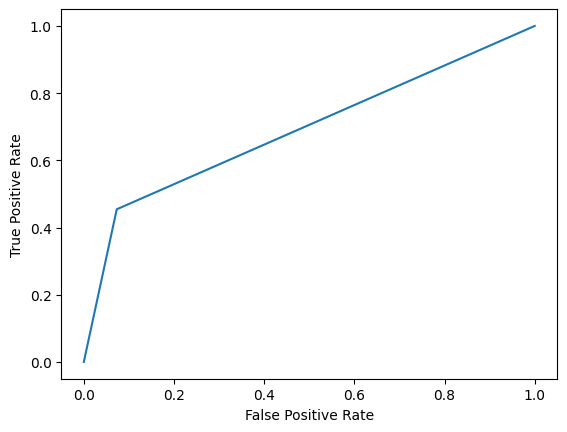

In [38]:
fpr, tpr, _ = roc_curve(y_test, dt_pred_proba, pos_label=3)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

**EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.**

In [39]:
!pip install evalml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
!pip install scikit-learn==0.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.24.0-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evalml 0.76.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.0 which is incompatible.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.0 which is incompatible.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


**We will use the same train and test dataset for this**

In [54]:
!pip install --upgrade evalml
!pip install --upgrade numba
import evalml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [43]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

**Running the Auto ML to select best Algorithm**

In [44]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Undersampler': 6.007889747619629,
  'Total time of batch': 6.1540069580078125},
 2: {'Random Forest Classifier w/ Label Encoder + Imputer + Undersampler + RF Classifier Select From Model': 15.721688747406006,
  'Total time of batch': 15.9092435836792},
 3: {'Decision Tree Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 5.8393518924713135,
  'LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 13.129191398620605,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 7.7863030433654785,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler + Select Columns Transformer': 7.797880411148071,
  'CatBoost Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 3.5850231647491455,
  'XGBoost Classifier w/ Label Encoder + Imputer + Undersampler + Select Col

In [45]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.240881,0.240881,0.000513,92.386643,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,8,XGBoost Classifier w/ Label Encoder + Imputer ...,8,0.242079,0.242079,0.001724,92.348756,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Elastic Net Classifier w/ Label Encoder + Impu...,6,0.269819,0.269819,0.001255,91.471995,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,9,Logistic Regression Classifier w/ Label Encode...,9,0.269828,0.269828,0.001260,91.471710,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,Random Forest Classifier w/ Label Encoder + Im...,2,0.288569,0.288569,0.000605,90.879406,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.297097,0.297097,0.000897,90.609838,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,5,Extra Trees Classifier w/ Label Encoder + Impu...,5,0.303820,0.303820,0.000674,90.397350,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,3,Decision Tree Classifier w/ Label Encoder + Im...,3,0.344241,0.344241,0.012182,89.119788,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,7,CatBoost Classifier w/ Label Encoder + Imputer...,7,0.517267,0.517267,0.001809,83.651098,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,0,Mode Baseline Binary Classification Pipeline,0,3.163922,3.163922,0.001683,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [46]:
automl.best_pipeline
best_pipeline=automl.best_pipeline

In [47]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************************


* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer *


**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Undersampler


INFO:evalml.pipelines.component_graph.describe:3. Undersampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * min_samples : 100


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples : 100


	 * min_percentage : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * min_percentage : 0.1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : ['no_of_trainings', 'age_log', 'previous_year_rating', 'length_of_service_log', 'awards_won', 'avg_training_score_log', 'department_Analytics', 'department_Finance', 'department_Operations', 'department_Procurement', 'department_Sales & Marketing', 'department_Technology', 'region_region_13', 'region_region_15', 'region_region_2', 'region_region_22', 'region_region_23', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_31', 'region_region_4', 'region_region_7', "education_Bachelor's", "education_Master's & above", 'gender_f', 'gender_m', 'recruitment_channel_other', 'recruitment_channel_sourcing']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['no_of_trainings', 'age_log', 'previous_year_rating', 'length_of_service_log', 'awards_won', 'avg_training_score_log', 'department_Analytics', 'department_Finance', 'department_Operations', 'department_Procurement', 'department_Sales & Marketing', 'department_Technology', 'region_region_13', 'region_region_15', 'region_region_2', 'region_region_22', 'region_region_23', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_31', 'region_region_4', 'region_region_7', "education_Bachelor's", "education_Master's & above", 'gender_f', 'gender_m', 'recruitment_channel_other', 'recruitment_channel_sourcing']


5. LightGBM Classifier


INFO:evalml.pipelines.component_graph.describe:5. LightGBM Classifier


	 * boosting_type : gbdt


INFO:evalml.pipelines.components.component_base.describe:	 * boosting_type : gbdt


	 * learning_rate : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * learning_rate : 0.1


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 0


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 0


	 * num_leaves : 31


INFO:evalml.pipelines.components.component_base.describe:	 * num_leaves : 31


	 * min_child_samples : 20


INFO:evalml.pipelines.components.component_base.describe:	 * min_child_samples : 20


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * bagging_freq : 0


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_freq : 0


	 * bagging_fraction : 0.9


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_fraction : 0.9


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 13.1 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 13.1 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.241       0.520 0.630 0.815      0.763 0.520                     0.691            0.936     24,736       12,368
1                      0.241       0.513 0.602 0.801      0.791 0.503                     0.679            0.936     24,736       12,368
2                      0.240       0.504 0.630 0.815      0.751 0.503                     0.683            0.934     24,736       12,368
mean                   0.241       0.512 0.621 0.810      0.768 0.509                     0.685            0.936          -            -
std                    0.001       0.008 0.016 0.008      0.020 0.010                     0.006            0.001          -            -
coef of var            0.002       0.016 0.026 0.010      0.026 0.019                     0.009            0.001          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.241       0.520 0.630 0.815      0.763 0.520                     0.691            0.936     24,736       12,368
1                      0.241       0.513 0.602 0.801      0.791 0.503                     0.679            0.936     24,736       12,368
2                      0.240       0.504 0.630 0.815      0.751 0.503                     0.683            0.934     24,736       12,368
mean                   0.241       0.512 0.621 0.810      0.768 0.509                     0.685            0.936          -            -
std                    0.001       0.008 0.016 0.008      0.020 0.010                     0.006            0.001          -            -
coef of var            0.002       0.016 0.026 0.010      0.026 0.019                     0.009            0.001          -    

**Predicting the results**

In [48]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

In [49]:
best_pipeline.score(X_test, y_test,objectives=["accuracy binary"])

OrderedDict([('Accuracy Binary', 0.9380120741699008)])

**We can save and load our model in pickle file also**

In [50]:
best_pipeline.save("model.pkl")
final_model=automl.load('model.pkl')

In [51]:
pred=final_model.predict(X_test)

In [52]:
pred

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64

In [53]:
y_test

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64